In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pickle
import copy
import warnings
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from utils import set_seed
from main import *
import os


setting: Bayes_local
>>>>>>>start training : Bayes_local>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.6187529563903809
Epoch: 1, Steps: 24 | Train Loss: 1.9810358 val Loss: 1.5984577
Epoch: 2 cost time: 0.463519811630249
Epoch: 2, Steps: 24 | Train Loss: 1.3809652 val Loss: 1.2641754
Epoch: 3 cost time: 0.569490909576416
Epoch: 3, Steps: 24 | Train Loss: 1.0861745 val Loss: 1.0205945
Epoch: 4 cost time: 0.4647641181945801
Epoch: 4, Steps: 24 | Train Loss: 0.8671544 val Loss: 0.7931675
Epoch: 5 cost time: 0.4643378257751465
Epoch: 5, Steps: 24 | Train Loss: 0.7097005 val Loss: 0.6427553
Epoch: 6 cost time: 0.5920555591583252
Epoch: 6, Steps: 24 | Train Loss: 0.6097183 val Loss: 0.5567589
Epoch: 7 cost time: 0.4754481315612793
Epoch: 7, Steps: 24 | Train Loss: 0.5413545 val Loss: 0.4830902
Epoch: 8 cost time: 0.46538352966308594
Epoch: 8, Steps: 24 | Train Loss: 0.4881460 val Loss: 0.4298875
Epoch: 9 cost time: 0.5804531574249268
Epoch: 9, Steps: 24 | Train Loss: 0.4457863 val Loss: 0

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun


Epoch: 125 cost time: 0.5388188362121582
Epoch: 125, Steps: 24 | Train Loss: 0.0120771 val Loss: 0.0327939
EarlyStopping counter: 10 out of 10
Early stopping


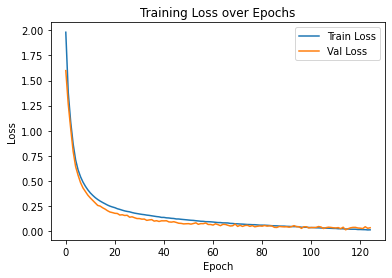

>>>>>>>testing : Bayes_local<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
torch.Size([100, 125808])
mape:0.042113061994314194, rmse:1536.7950439453125, mae:1123.6016845703125, pinball_loss:451.6310729980469
>>>>>>>start training : Bayes_local>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.43987154960632324
Epoch: 1, Steps: 24 | Train Loss: 1.9430207 val Loss: 1.6943938
Epoch: 2 cost time: 0.4309554100036621
Epoch: 2, Steps: 24 | Train Loss: 1.3715688 val Loss: 1.3637719
Epoch: 3 cost time: 0.41738176345825195
Epoch: 3, Steps: 24 | Train Loss: 1.0948707 val Loss: 1.1493613
Epoch: 4 cost time: 0.4529240131378174
Epoch: 4, Steps: 24 | Train Loss: 0.8707150 val Loss: 0.9272461
Epoch: 5 cost time: 0.5421469211578369
Epoch: 5, Steps: 24 | Train Loss: 0.6497585 val Loss: 0.7627648
Epoch: 6 cost time: 0.5655851364135742
Epoch: 6, Steps: 24 | Train Loss: 0.5018725 val Loss: 0.6814707
Epoch: 7 cost time: 0.5835781097412109
Epoch: 7, Steps: 24 | Train Loss: 0.4037751 val Loss: 0.6160430
Epoch: 8 cost time: 

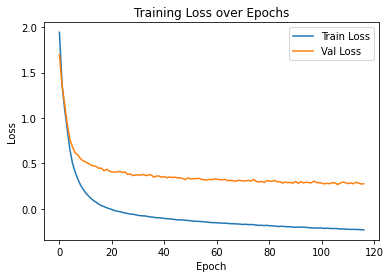

>>>>>>>testing : Bayes_local<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
torch.Size([100, 125808])
mape:0.05687565356492996, rmse:181.64959716796875, mae:117.79225158691406, pinball_loss:48.256553649902344
>>>>>>>start training : Bayes_local>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 0.4799342155456543
Epoch: 1, Steps: 24 | Train Loss: 1.9417954 val Loss: 1.5559975
Epoch: 2 cost time: 0.5418045520782471
Epoch: 2, Steps: 24 | Train Loss: 1.2994644 val Loss: 1.1997356
Epoch: 3 cost time: 0.5503401756286621
Epoch: 3, Steps: 24 | Train Loss: 0.9466102 val Loss: 0.8681306
Epoch: 4 cost time: 0.5488944053649902
Epoch: 4, Steps: 24 | Train Loss: 0.6522560 val Loss: 0.5443459
Epoch: 5 cost time: 0.559187650680542
Epoch: 5, Steps: 24 | Train Loss: 0.4482216 val Loss: 0.3340507
Epoch: 6 cost time: 0.5522346496582031
Epoch: 6, Steps: 24 | Train Loss: 0.3193243 val Loss: 0.2232611
Epoch: 7 cost time: 0.5655808448791504
Epoch: 7, Steps: 24 | Train Loss: 0.2319678 val Loss: 0.1207742
Epoch: 8 cost time: 0.5

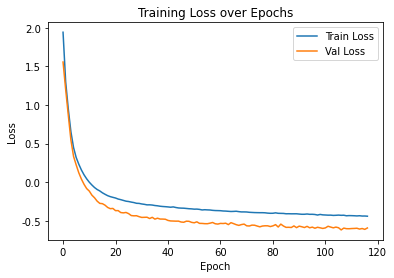

>>>>>>>testing : Bayes_local<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
torch.Size([100, 125808])
mape:0.07240290939807892, rmse:3252.684326171875, mae:2242.996337890625, pinball_loss:932.4683227539062


In [2]:
set_seed(42)

parser = argparse.ArgumentParser(description='Diffusion TimeXer')
parser.add_argument('--seed', type=int, default=42)
#basic config
parser.add_argument('--local_model', type=str, default='MLP',
                    help='model name, options: [MLP, GRU, Bayes, Diff(TimeXer), Diff(MLP)]')
parser.add_argument('--server_model', type=str, default='Diff(TimeXer)',
                    help='model name, options: [MLP, Diff(TimeXer), Diff(MLP)]')
parser.add_argument('--central_model', type=str, default='MLP',
                    help='model name, options: [MLP, GRU, Diff(TimeXer), Diff(MLP),Bayes]')
parser.add_argument('--add_noise', type=int, default=0, help='whether to add noise, 0: no, 1: yes')
parser.add_argument('--noise_ratio', type=float, default=0.1, help='ratio of noise, options [0.1,0.2,0.3,0.4]')
parser.add_argument('--noise_type', type=str, default='gaussian', help='type of noise, options: [gaussian,offset,reset]')


#data loader
parser.add_argument('--data_path', type=str, default='/home/user/workspaces/残差diff(TimeXer)封装版/Data/data.csv', help='data file')
parser.add_argument('--train_len', type=float, default=0.7, help='ratio of training data')
parser.add_argument('--val_len', type=float, default=0.15, help='ratio of validation data')
parser.add_argument('--seq_len', type=int, default=24*4)
parser.add_argument('--ex_dim', type=int, default=24*6)
parser.add_argument('--label_len', type=int, default=24)
parser.add_argument('--batch_size', type=int, default=1024)
parser.add_argument('--checkpoints', type=str, default='./checkpoints/', help='location of model checkpoints')
#training confi
parser.add_argument('--lr', type=float, default=5e-4)
parser.add_argument('--epochs_local', type=int, default=300)
parser.add_argument('--epochs_server', type=int, default=100)
parser.add_argument('--epochs_central', type=int, default=100)
parser.add_argument('--patience', type=int, default=10) 
parser.add_argument('--device', type=str, default=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
#model config
parser.add_argument('--local_layer_size', type=list, default=[128,128],help='local mlp layer size')
parser.add_argument('--layer_size', type=list, default=[128,128,128],help='mlp layer size')
parser.add_argument('--dropout', type=float, default=0.1)
parser.add_argument('--hidden_dim', type=int, default=128, help='gru/lstm hidden dim') #用lstm的时候这个改成64，用mlp的时候与mlp的layersize一致
parser.add_argument('--num_layer', type=int, default=2, help='gru/lstm layer num')
parser.add_argument('--num_steps', type=int, default=50, help='diffusion steps')
parser.add_argument('--diff_layers', type=int, default=3, help='diffusion using mlp')
parser.add_argument('--use_norm', type=int, default=1, help='whether to use normalize; True 1 False 0')
parser.add_argument('--d_model', type=int, default=128) 
parser.add_argument('--activation', type=str, default='gelu')
parser.add_argument('--e_layers', type=int, default=3, help='num of encoder layers')#改
parser.add_argument('--d_ff', type=int, default=256, help='dimension of fcn') ##改
parser.add_argument('--n_heads', type=int, default=8)
parser.add_argument('--patch_len', type=int, default=8)
#load从'Electricity','Steam','Chillwater'中选择

# 解析参数
args, unknown = parser.parse_known_args()
warnings.filterwarnings("ignore")


args.local_model = 'Bayes'
# args.server_model = 'MLP'
# args.add_noise = 0
# args.central_model = 'Bayes'

# setting = '{}-{}-noise:{}-{}-{}'.format(args.local_model, args.server_model, args.add_noise, args.noise_ratio, args.noise_type)
# setting = '{}_central'.format(args.central_model)
# setting = '{}_central_multi'.format(args.central_model)
setting = '{}_local'.format(args.local_model)
print('setting: {}'.format(setting))

# print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
# local_model.train(args,setting)
# print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
# local_model.test(args,setting)

elec_local_model = LocalModel(args)
print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
elec_local_model.train(args,setting,'Electricity')
print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
elec_local_model.test(args,setting,'Electricity')
torch.cuda.empty_cache()

steam_local_model = LocalModel(args)
print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
steam_local_model.train(args,setting,'Steam')
print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
steam_local_model.test(args,setting,'Steam')
torch.cuda.empty_cache()

chill_local_model = LocalModel(args)
print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
chill_local_model.train(args,setting,'Chillwater')
print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
chill_local_model.test(args,setting,'Chillwater')
torch.cuda.empty_cache()


